<a href="https://colab.research.google.com/github/Namratapandey2327/Student_Performance_Analytics_Engine-SPAE/blob/main/Student_Performance_Analytics_Engine_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np




In [5]:
data = np.genfromtxt(
    'Student_Performance.csv',
    delimiter=',',
    skip_header=1,
    usecols=(11,12,13,14)
)

print("Shape:", data.shape)
print("First 5 rows:\n", data[:5])

Shape: (25000, 4)
First 5 rows:
 [[42.7 55.4 57.  53.1]
 [57.6 68.8 64.8 61.3]
 [84.8 95.  79.2 89.6]
 [44.4 27.5 54.7 41.6]
 [ 8.9 32.7 30.  25.4]]


In [18]:
math_scores = data[:, 0]
science_scores = data[:, 1]
english_scores = data[:, 2]
overall_scores = data[:, 3]


In [ ]:

def sanitize_scores(scores):
    try:
        scores = np.asarray(scores)

        if scores.size == 0:
            return None

        if not np.issubdtype(scores.dtype, np.number):
            raise TypeError("Scores must be numeric")

        scores = scores[~np.isnan(scores)]

        if scores.size == 0:
            return None

        return scores

    except Exception as e:
        print(f"Sanitization Error: {e}")
        return None


def get_class_average(scores):
    try:
        scores = sanitize_scores(scores)
        if scores is None:
            return None
        return np.mean(scores)
    except Exception as e:
        print(f"get_class_average Error: {e}")
        return None


def get_top_score(scores):
    try:
        scores = sanitize_scores(scores)
        if scores is None:
            return None
        return np.max(scores)
    except Exception as e:
        print(f"get_top_score Error: {e}")
        return None


def get_lowest_score(scores):
    try:
        scores = sanitize_scores(scores)
        if scores is None:
            return None
        return np.min(scores)
    except Exception as e:
        print(f"get_lowest_score Error: {e}")
        return None


def get_failed_students(scores, threshold=40):
    try:
        scores = sanitize_scores(scores)
        if scores is None:
            return np.array([])
        return np.where(scores < threshold)[0]
    except Exception as e:
        print(f"get_failed_students Error: {e}")
        return np.array([])


def get_high_performers(scores, threshold=85):
    try:
        scores = sanitize_scores(scores)
        if scores is None:
            return np.array([])
        return np.where(scores >= threshold)[0]
    except Exception as e:
        print(f"get_high_performers Error: {e}")
        return np.array([])


def get_top_n_students(scores, n=10):
    try:
        scores = sanitize_scores(scores)
        if scores is None:
            return np.array([])
        ranking = np.argsort(scores)[::-1]
        return ranking[:n]
    except Exception as e:
        print(f"get_top_n_students Error: {e}")
        return np.array([])


def get_bottom_n_students(scores, n=10):
    try:
        scores = sanitize_scores(scores)
        if scores is None:
            return np.array([])
        ranking = np.argsort(scores)
        return ranking[:n]
    except Exception as e:
        print(f"get_bottom_n_students Error: {e}")
        return np.array([])


In [19]:
print("Class Average:", get_class_average(overall_scores))

print("Top Score:", get_top_score(overall_scores))

print("Lowest Score:", get_lowest_score(overall_scores))

print("Failed Students Count:", len(get_failed_students(overall_scores)))

print("High Performers Count:", len(get_high_performers(overall_scores)))

print("Top 10 Students:", get_top_n_students(overall_scores))

print("Bottom 10 Students:", get_bottom_n_students(overall_scores))


Class Average: 64.006172
Top Score: 100.0
Lowest Score: 14.5
Failed Students Count: 2941
High Performers Count: 3911
Top 10 Students: [ 6164 24938 24949 19385 12132  6181 14659 14668 14705 24927]
Bottom 10 Students: [ 5519 12849 12483  5639 11405 22609 21297 10776 23988  4040]


In [20]:
import matplotlib.pyplot as plt


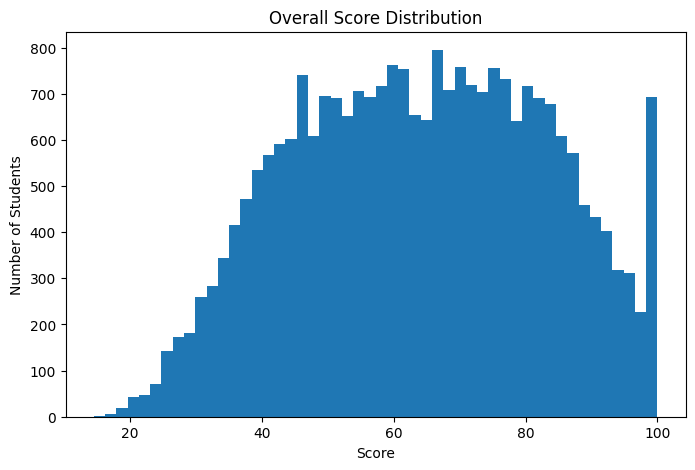

In [21]:
plt.figure(figsize=(8,5))

plt.hist(overall_scores, bins=50)

plt.title("Overall Score Distribution")
plt.xlabel("Score")
plt.ylabel("Number of Students")

plt.show()


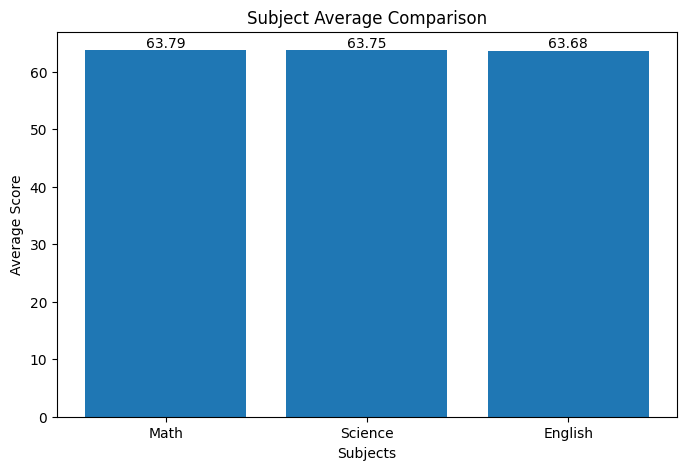

In [23]:
subjects = ["Math", "Science", "English"]

averages = [
    get_class_average(math_scores),
    get_class_average(science_scores),
    get_class_average(english_scores)
]

plt.figure(figsize=(8,5))

bars = plt.bar(subjects, averages)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f"{height:.2f}",
        ha='center',
        va='bottom'
    )

plt.title("Subject Average Comparison")
plt.xlabel("Subjects")
plt.ylabel("Average Score")

plt.show()


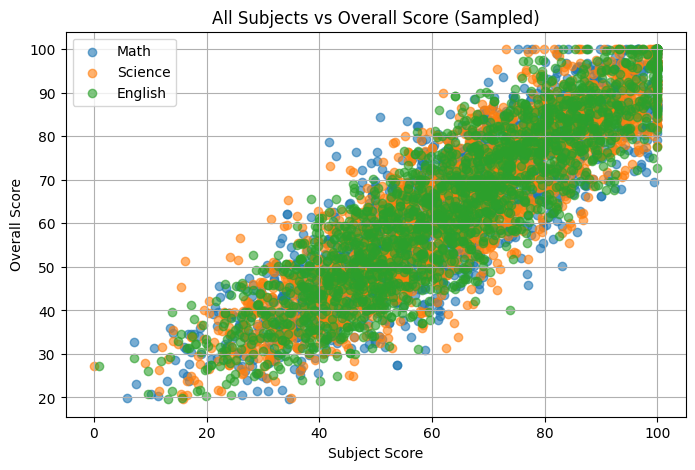

In [33]:
sample_size = 2000

indices = np.random.choice(len(overall_scores), sample_size, replace=False)

plt.figure(figsize=(8,5))

plt.scatter(math_scores[indices], overall_scores[indices], label="Math", alpha=0.6)

plt.scatter(science_scores[indices], overall_scores[indices], label="Science", alpha=0.6)

plt.scatter(english_scores[indices], overall_scores[indices], label="English", alpha=0.6)

plt.title("All Subjects vs Overall Score (Sampled)")

plt.xlabel("Subject Score")
plt.ylabel("Overall Score")

plt.legend()
plt.grid(True)

plt.show()


/tmp/ipython-input-3860018374.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


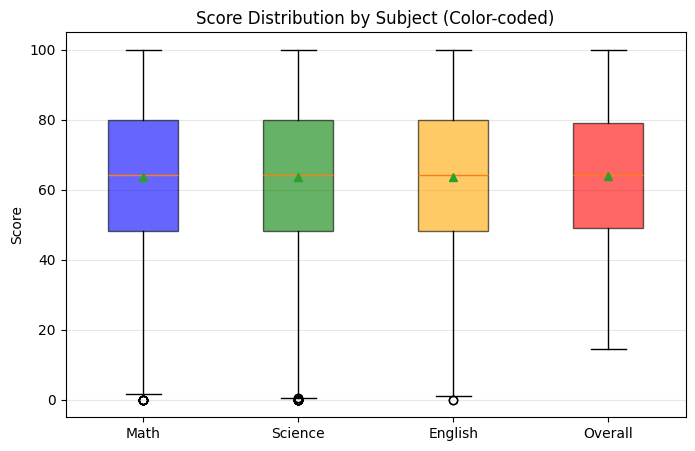

In [34]:
plt.figure(figsize=(8,5))

box = plt.boxplot(
    [math_scores, science_scores, english_scores, overall_scores],
    patch_artist=True,   # allows coloring
    labels=["Math", "Science", "English", "Overall"],
    showmeans=True
)

# Define colors for each subject
colors = ["blue", "green", "orange", "red"]

# Apply colors
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

plt.title("Score Distribution by Subject (Color-coded)")
plt.ylabel("Score")

plt.grid(axis='y', alpha=0.3)

plt.show()
